# Network Analysis with NetworkX

In this series of lessons, we're going to learn about network analysis. Network analysis will help us better understand the complex relationships between groups of people, fictional characters, and other kinds of things.

## Install NetworkX

In [1]:
!pip install networkx

## Import Libraries

In [2]:
import networkx
import pandas as pd
#pd.set_option('max_rows', 400)
import matplotlib.pyplot as plt

## *Tennis Matches* Network

The network data that we're going to use in this lesson is taken from Andrew Beveridge and Jie Shan's paper, ["Network of Thrones."](https://www.maa.org/sites/default/files/pdf/Mathhorizons/NetworkofThrones%20%281%29.pdf)

These researchers calculated how many times each Game of Thrones character appeared within 15 words of another character in *A Storm of Swords*, the third book in the series.

| Network Element      | GOT |         
| :-------------: |:-------------:|
| Node    | GOT character |
| Edge     | Mutually mentioned within 15 words      |
| Float | Decimal Numbers      |  
| Boolean | True/False     |   


For example, the following sentence counts as an "edge" or connection between Jon Snow and Sam Tarly:

In [4]:
tennis_df = pd.read_csv("C:/Users/ed_ie/OneDrive/Área de Trabalho/atp_tennis.csv", sep=",", encoding="ISO-8859-1")

In [5]:
tennis_df

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,-1,-1,-1.00,-1.00,6-4 6-2
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.00,-1.00,3-6 3-6
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,-1,-1,-1.00,-1.00,6-7 7-5 6-3
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,-1,-1,-1.00,-1.00,1-6 4-6
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,-1,-1,-1.00,-1.00,7-6 5-7 6-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63195,Wimbledon,2024-07-09,Grand Slam,Outdoor,Grass,Quarterfinals,5,Paul T.,Alcaraz C.,Alcaraz C.,13,3,3100,8130,4.00,1.25,7-5 4-6 2-6 2-6
63196,Wimbledon,2024-07-10,Grand Slam,Outdoor,Grass,Quarterfinals,5,Musetti L.,Fritz T.,Musetti L.,25,12,1620,3350,4.50,1.20,3-6 7-6 6-2 3-6 6-1
63197,Wimbledon,2024-07-12,Grand Slam,Outdoor,Grass,Semifinals,5,Medvedev D.,Alcaraz C.,Alcaraz C.,5,3,6445,8130,3.75,1.29,7-6 3-6 4-6 4-6
63198,Wimbledon,2024-07-12,Grand Slam,Outdoor,Grass,Semifinals,5,Djokovic N.,Musetti L.,Djokovic N.,2,25,8360,1620,1.11,6.50,6-4 7-6 6-4


## Create a Network From a Pandas DataFrame

In [6]:
G = networkx.from_pandas_edgelist(tennis_df, 'Player_1', 'Player_2', 'Winner')

## Output a Network File

In [7]:
networkx.write_graphml(G, 'Tennis-network.graphml')

## Draw a Simple Network

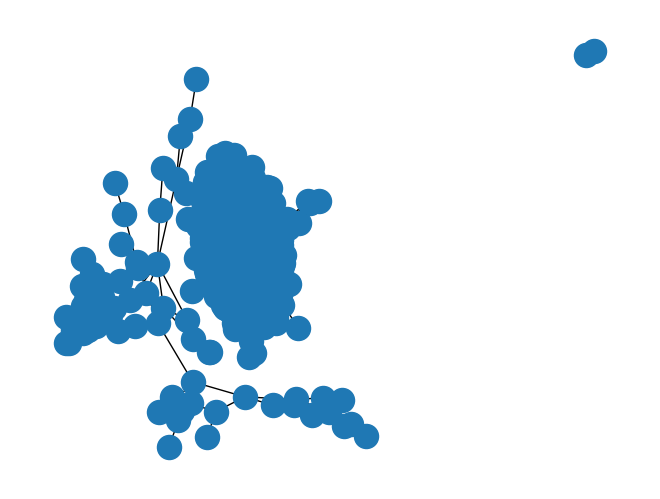

In [8]:
networkx.draw(G)

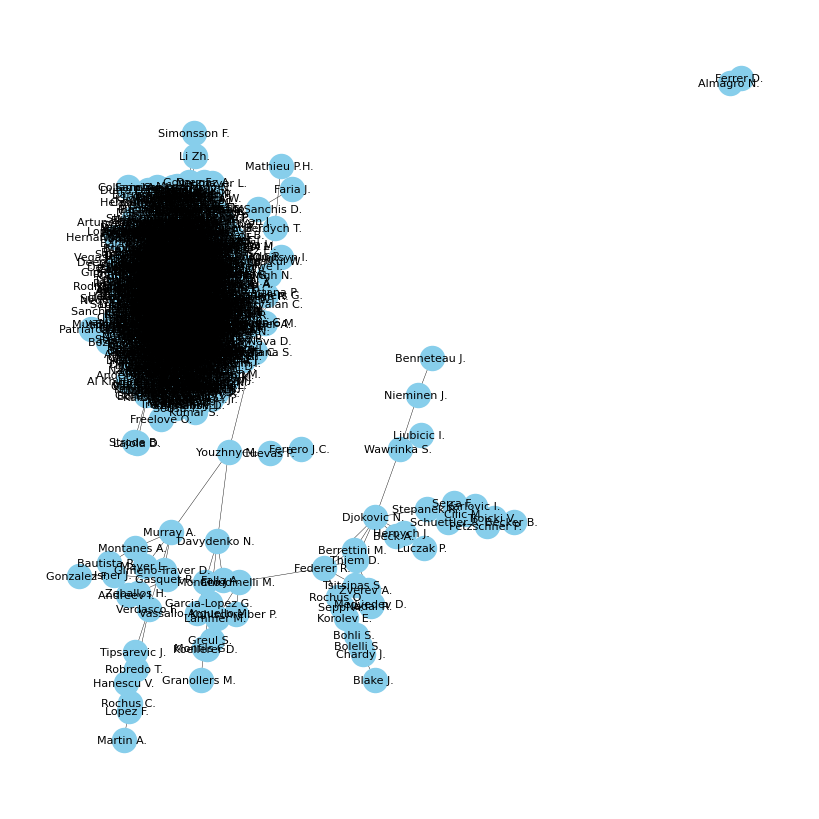

In [9]:
plt.figure(figsize=(8,8))
networkx.draw(G, with_labels=True, node_color='skyblue', width=.3, font_size=8)

## Calculate Degree

Who has the most number of connections in the network?

In [10]:
networkx.degree(G)

DegreeView({'Dosedel S.': 46, 'Ljubicic I.': 243, 'Clement A.': 219, 'Enqvist T.': 134, 'Escude N.': 105, 'Baccanello P.': 9, 'Knippschild J.': 37, 'Federer R.': 333, 'Fromberg R.': 42, 'Woodbridge T.': 17, 'Arthurs W.': 148, 'Gambill J.M.': 139, 'Grosjean S.': 195, 'Ilie A.': 80, 'Balcells J.': 63, 'Henman T.': 176, 'Hewitt L.': 274, 'Woodforde M.': 9, 'Tebbutt M.': 3, 'Lisnard J.': 25, 'Martin A.': 239, 'Spadea V.': 183, 'Draper S.': 44, 'Norman M.': 100, 'Petrovic D.': 13, 'Huet S.': 26, 'Pozzi G.': 57, 'Sekulov J.': 11, 'Stoltenberg J.': 40, 'Hrbaty D.': 200, 'Goldstein P.': 120, 'Vinck C.': 32, 'Kumar S.': 1, 'Agenor R.': 25, 'Behrend T.': 79, 'Popp A.': 88, 'Rochus C.': 182, 'Damm M.': 40, 'Delgado J.': 34, 'Black B.': 60, 'Spottl M.': 2, 'Golmard J.': 91, 'Hantschk M.': 48, 'Tieleman L.': 27, 'Kroslak J.': 16, 'Jonsson F.': 21, 'Ketola T.': 19, 'Ogorodov O.': 12, 'Zib T.': 96, 'Manta L.': 16, 'Paes L.': 13, 'Boutter J.': 90, 'Ram A.': 10, 'Pioline C.': 75, 'Sanguinetti D.': 174,

Make the degree values a `dict`ionary, then add it as a network "attribute" with `networkx.set_node_attributes()`

In [11]:
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)

Make a Pandas dataframe from the degree data `G.nodes(data='degree')`, then sort from highest to lowest

In [12]:
degree_df = pd.DataFrame(G.nodes(data='degree'), columns=['node', 'degree'])
degree_df = degree_df.sort_values(by='degree', ascending=False)
degree_df

,node,degree
225,Lopez F.,347
442,Gasquet R.,337
7,Federer R.,333
441,Verdasco F.,325
657,Monfils G.,319
...,...,...
863,Al-Ghareeb M.,1
870,Marrai M.,1
875,Lipsky S.,1
881,Middelkoop M.,1


Plot the nodes with the highest degree values

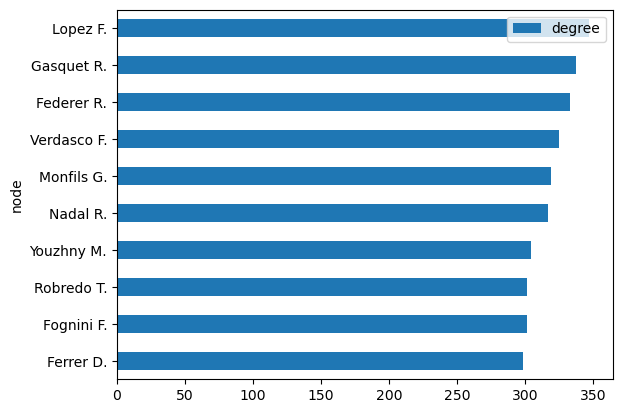

In [13]:
num_nodes_to_inspect = 10
degree_df[:num_nodes_to_inspect].plot(x='node', y='degree', kind='barh').invert_yaxis()

## Calculate Weighted Degree

Who has the most number of connections in the network (if you factor in edge weight)?

In [14]:
networkx.degree(G, weight='Weight')

DegreeView({'Dosedel S.': 46, 'Ljubicic I.': 243, 'Clement A.': 219, 'Enqvist T.': 134, 'Escude N.': 105, 'Baccanello P.': 9, 'Knippschild J.': 37, 'Federer R.': 333, 'Fromberg R.': 42, 'Woodbridge T.': 17, 'Arthurs W.': 148, 'Gambill J.M.': 139, 'Grosjean S.': 195, 'Ilie A.': 80, 'Balcells J.': 63, 'Henman T.': 176, 'Hewitt L.': 274, 'Woodforde M.': 9, 'Tebbutt M.': 3, 'Lisnard J.': 25, 'Martin A.': 239, 'Spadea V.': 183, 'Draper S.': 44, 'Norman M.': 100, 'Petrovic D.': 13, 'Huet S.': 26, 'Pozzi G.': 57, 'Sekulov J.': 11, 'Stoltenberg J.': 40, 'Hrbaty D.': 200, 'Goldstein P.': 120, 'Vinck C.': 32, 'Kumar S.': 1, 'Agenor R.': 25, 'Behrend T.': 79, 'Popp A.': 88, 'Rochus C.': 182, 'Damm M.': 40, 'Delgado J.': 34, 'Black B.': 60, 'Spottl M.': 2, 'Golmard J.': 91, 'Hantschk M.': 48, 'Tieleman L.': 27, 'Kroslak J.': 16, 'Jonsson F.': 21, 'Ketola T.': 19, 'Ogorodov O.': 12, 'Zib T.': 96, 'Manta L.': 16, 'Paes L.': 13, 'Boutter J.': 90, 'Ram A.': 10, 'Pioline C.': 75, 'Sanguinetti D.': 174,

Make the weighted degree values a `dict`ionary, then add it as a network "attribute" with `networkx.set_node_attributes()`

In [15]:
weighted_degrees = dict(networkx.degree(G, weight='Weight'))
networkx.set_node_attributes(G, name='weighted_degree', values=weighted_degrees)

Make a Pandas dataframe from the degree data `G.nodes(data='weighted_degree')`, then sort from highest to lowest

In [16]:
weighted_degree_df = pd.DataFrame(G.nodes(data='weighted_degree'), columns=['node', 'weighted_degree'])
weighted_degree_df = weighted_degree_df.sort_values(by='weighted_degree', ascending=False)
weighted_degree_df

,node,weighted_degree
225,Lopez F.,347
442,Gasquet R.,337
7,Federer R.,333
441,Verdasco F.,325
657,Monfils G.,319
...,...,...
863,Al-Ghareeb M.,1
870,Marrai M.,1
875,Lipsky S.,1
881,Middelkoop M.,1


Plot the nodes with the highest weighted degree values

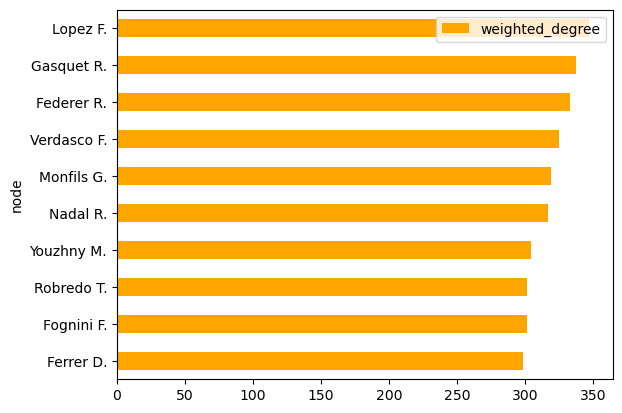

In [17]:
num_nodes_to_inspect = 10
weighted_degree_df[:num_nodes_to_inspect].plot(x='node', y='weighted_degree', color='orange', kind='barh').invert_yaxis()

## Calculate Betweenness Centrality Scores

Who connects the most other nodes in the network?

In [18]:
networkx.betweenness_centrality(G)

{'Dosedel S.': 0.0012010082212856553,
 'Ljubicic I.': 0.01276396499312481,
 'Clement A.': 0.005146589430562659,
 'Enqvist T.': 0.001162104402231695,
 'Escude N.': 0.0026293768635402607,
 'Baccanello P.': 1.5380897809411442e-06,
 'Knippschild J.': 0.0011961108855373815,
 'Federer R.': 0.02033966415470975,
 'Fromberg R.': 0.0007394779044371784,
 'Woodbridge T.': 1.5204457154269667e-05,
 'Arthurs W.': 0.0025102973404459127,
 'Gambill J.M.': 0.0019561598394423015,
 'Grosjean S.': 0.006237223877902528,
 'Ilie A.': 0.0013476543672577288,
 'Balcells J.': 0.0003045441692309021,
 'Henman T.': 0.004288133243121487,
 'Hewitt L.': 0.01084910701254129,
 'Woodforde M.': 1.6767273614973374e-05,
 'Tebbutt M.': 1.067267335009095e-06,
 'Lisnard J.': 0.0003549022923695842,
 'Martin A.': 0.016978690240635298,
 'Spadea V.': 0.004555307519056389,
 'Draper S.': 0.0001881921973883156,
 'Norman M.': 0.0023912336140224865,
 'Petrovic D.': 9.350757925963284e-05,
 'Huet S.': 0.00036523475604409927,
 'Pozzi G.': 0

In [19]:
betweenness_centrality = networkx.betweenness_centrality(G)

Add `betweenness_centrality` (which is already a dictionary) as a network "attribute" with `networkx.set_node_attributes()`

In [20]:
networkx.set_node_attributes(G, name='betweenness', values=betweenness_centrality)

Make a Pandas dataframe from the betweenness data `G.nodes(data='betweenness')`, then sort from highest to lowest

In [21]:
betweenness_df = pd.DataFrame(G.nodes(data='betweenness'), columns=['node', 'betweenness'])
betweenness_df = betweenness_df.sort_values(by='betweenness', ascending=False)
betweenness_df

,node,betweenness
442,Gasquet R.,0.026065
225,Lopez F.,0.024661
441,Verdasco F.,0.021673
7,Federer R.,0.020340
218,Youzhny M.,0.019587
...,...,...
1191,Salamanca C.,0.000000
529,Logtens P.,0.000000
525,Koderisch C.,0.000000
1200,Westerhof B.,0.000000


Plot the nodes with the highest betweenness centrality scores

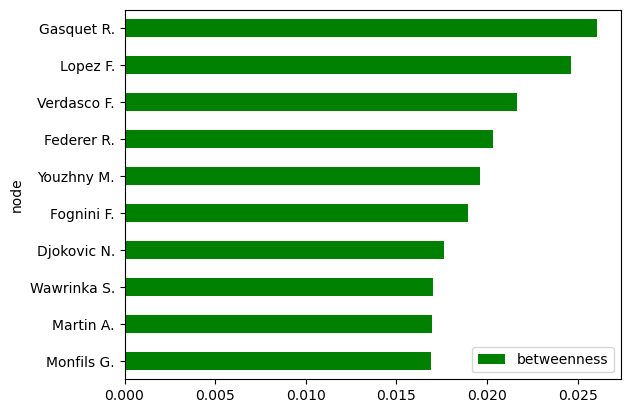

In [22]:
num_nodes_to_inspect = 10
betweenness_df[:num_nodes_to_inspect].plot(x='node', y='betweenness', color='green', kind='barh').invert_yaxis()

## Communities

Who forms distinct communities within this network?

In [23]:
from networkx.algorithms import community

Calculate communities with `community.greedy_modularity_communities()`

In [24]:
communities = community.greedy_modularity_communities(G)

In [26]:
communities

[frozenset({'Abdulla M.',
            'Agamenone F.',
            'Agostinelli B.',
            'Ahouda A.',
            'Ajdukovic D.',
            'Albot R.',
            'Alcaide G.',
            'Alcaraz C.',
            'Almagro N.',
            'Altamirano C.',
            'Altmaier D.',
            'Alvarez Varona N.',
            'Alves M.',
            'Anderson A.',
            'Anderson K.',
            'Anderson O.',
            'Andreev A.',
            'Andreozzi G.',
            'Androic T.',
            'Andujar P.',
            'Aragone J.',
            'Aragone J.C.',
            'Aragone JC',
            'Arevalo M.',
            'Arguello F.',
            'Arnaboldi A.',
            'Arnaldi M.',
            'Artunedo Martinavarro A.',
            'Arvidsson I.',
            'Atmane T.',
            'Auger-Aliassime F.',
            'Avidzba A.',
            'Awadhy O.',
            'Azzaro L.',
            'Bachinger M.',
            'Baez S.',
            'Baghdat

Make a `dict`ionary by looping through the communities and, for each member of the community, adding their community number

In [27]:
# Create empty dictionary
modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number

Add modularity class to the network as an attribute

In [28]:
networkx.set_node_attributes(G, modularity_class, 'modularity_class')

Make a Pandas dataframe from modularity class network data `G.nodes(data='modularity_class')`

In [29]:
communities_df = pd.DataFrame(G.nodes(data='modularity_class'), columns=['node', 'modularity_class'])
communities_df = communities_df.sort_values(by='modularity_class', ascending=False)

In [30]:
communities_df

,node,modularity_class
1696,Faria J.,15
1695,Jorda Sanchis D.,15
1401,Leshem E.,14
1570,Oliel Y.,14
1344,Simonsson F.,13
...,...,...
1095,Wang J.,0
1097,Kern R.,0
1098,Kosakowski D.,0
1099,Grigelis L.,0


Inspect each community in the network

In [31]:
communities_df[communities_df['modularity_class'] == 4]

,node,modularity_class
1096,Olaso G.,4
1172,Granollers G.,4
814,Nielsen F.,4
705,Crivoi V.,4
672,Kuznetsov A.,4


In [32]:
communities_df[communities_df['modularity_class'] == 3]

,node,modularity_class
1007,Gimeno-Traver D.,3
1008,Rochus C.,3
1009,Robredo T.,3
1006,Murray A.,3
1010,Tipsarevic J.,3
1005,Cuevas P.,3
998,Monaco J.,3
1004,Ferrero J.C.,3
1003,Andreev I.,3
1002,Mayer L.,3


In [33]:
communities_df[communities_df['modularity_class'] == 2]

,node,modularity_class
968,Troicki V.,2
969,Becker B.,2
970,Beck A.,2
971,Djokovic N.,2
973,Benneteau J.,2
974,Koellerer D.,2
975,Lammer M.,2
964,Chiudinelli M.,2
967,Korolev E.,2
966,Bolelli S.,2


In [34]:
communities_df[communities_df['modularity_class'] == 1]

,node,modularity_class
544,Greul S.,1
557,Tuksar S.,1
556,Karanusic R.,1
558,Yim R.,1
562,Youzhny A.,1
...,...,...
274,Tiilikainen K.,1
386,Mutis O.,1
275,Kempes E.,1
268,Arnold L.,1


In [35]:
communities_df[communities_df['modularity_class'] == 0]

,node,modularity_class
1429,Seyboth Wild T.,0
1431,Vatutin A.,0
1428,Gaston H.,0
1427,Auger-Aliassime F.,0
1260,Takeuchi K.,0
...,...,...
1095,Wang J.,0
1097,Kern R.,0
1098,Kosakowski D.,0
1099,Grigelis L.,0


Plot a sample of 40 characters with their modularity class indicated by a star

In [40]:
import seaborn as sns

C:\Users\ed_ie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ed_ie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


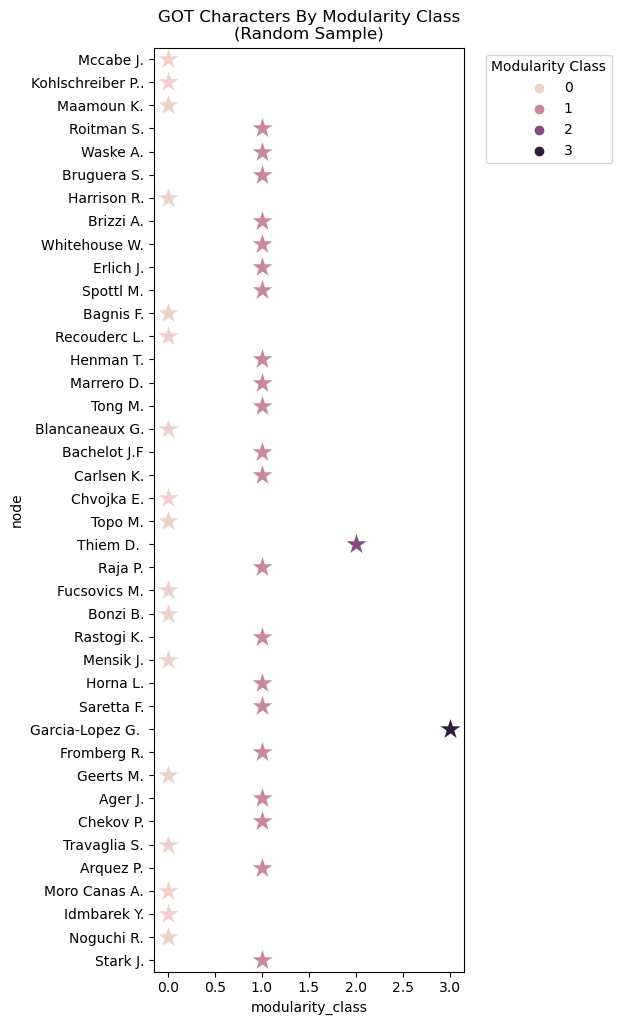

In [41]:
#Set figure size
plt.figure(figsize=(4,12))

#Plot a categorical scatter plot from the dataframe communities_df.sample(40)
ax =sns.stripplot(x='modularity_class', y='node', data=communities_df.sample(40),
              hue='modularity_class', marker='*',size=15)
#Set legend outside the plot with bbox_to_anchor
ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("GOT Characters By Modularity Class\n(Random Sample)")
plt.show()

Plot all Tennis players with their modularity class indicated by a star (tak

C:\Users\ed_ie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ed_ie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


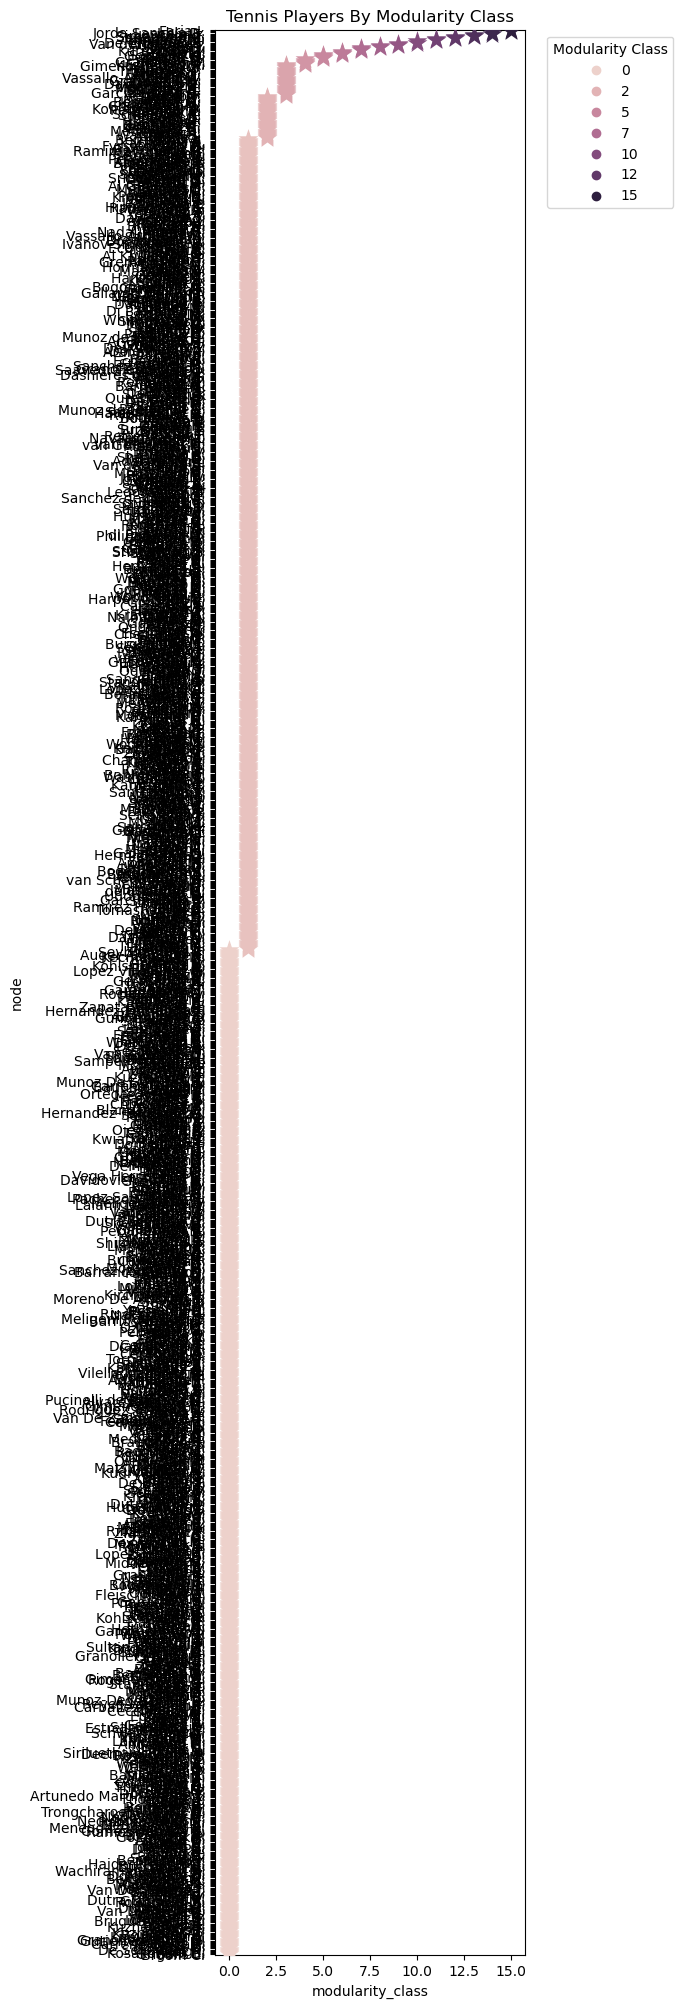

In [43]:
plt.figure(figsize=(4,25))

ax =sns.stripplot(x='modularity_class', y='node', data=communities_df,
              hue='modularity_class', marker='*',size=15)

ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("Tennis Players By Modularity Class")
plt.show()

C:\Users\ed_ie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ed_ie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


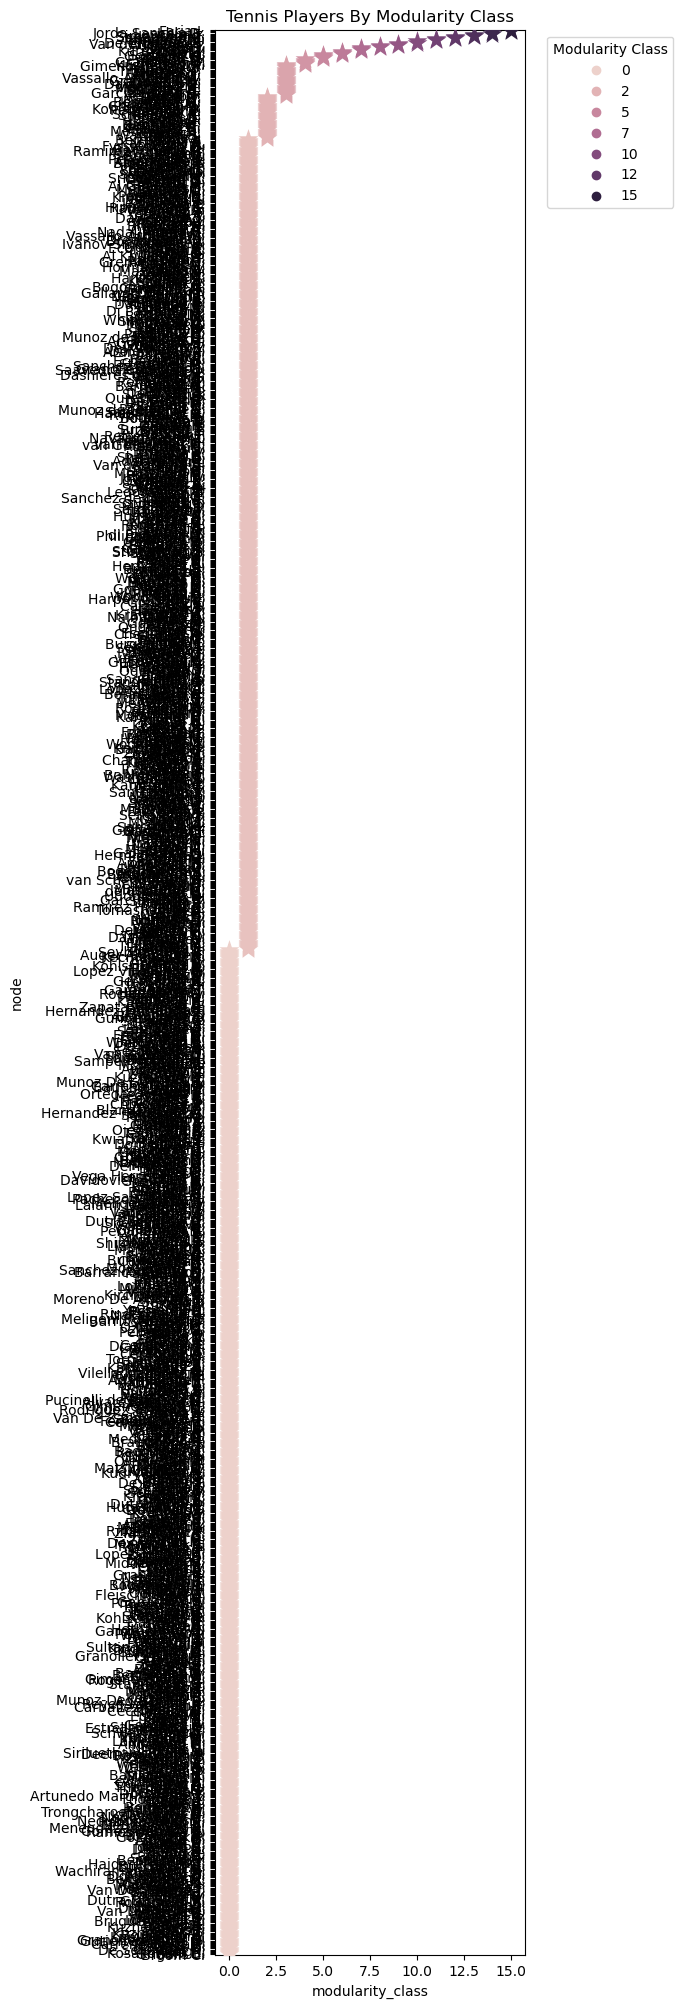

In [45]:
plt.figure(figsize=(4,25))

ax =sns.stripplot(x='modularity_class', y='node', data=communities_df,
              hue='modularity_class', marker='*',size=15)

ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("Tennis Players By Modularity Class")
plt.show()

## All Network Metrics

Create a Pandas dataframe of all network attributes by creating a `dict`ionary of `G.nodes(data=True)`...

In [46]:
dict(G.nodes(data=True))

{'Dosedel S.': {'degree': 46,
  'weighted_degree': 46,
  'betweenness': 0.0012010082212856553,
  'modularity_class': 1},
 'Ljubicic I.': {'degree': 243,
  'weighted_degree': 243,
  'betweenness': 0.01276396499312481,
  'modularity_class': 1},
 'Clement A.': {'degree': 219,
  'weighted_degree': 219,
  'betweenness': 0.005146589430562659,
  'modularity_class': 1},
 'Enqvist T.': {'degree': 134,
  'weighted_degree': 134,
  'betweenness': 0.001162104402231695,
  'modularity_class': 1},
 'Escude N.': {'degree': 105,
  'weighted_degree': 105,
  'betweenness': 0.0026293768635402607,
  'modularity_class': 1},
 'Baccanello P.': {'degree': 9,
  'weighted_degree': 9,
  'betweenness': 1.5380897809411442e-06,
  'modularity_class': 1},
 'Knippschild J.': {'degree': 37,
  'weighted_degree': 37,
  'betweenness': 0.0011961108855373815,
  'modularity_class': 1},
 'Federer R.': {'degree': 333,
  'weighted_degree': 333,
  'betweenness': 0.02033966415470975,
  'modularity_class': 1},
 'Fromberg R.': {'degr

...and then [transposing it](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.T.html) (flipping the columns and rows) with `.T`

In [47]:
nodes_df = pd.DataFrame(dict(G.nodes(data=True))).T
nodes_df

,degree,weighted_degree,betweenness,modularity_class
Dosedel S.,46.0,46.0,1.201008e-03,1.0
Ljubicic I.,243.0,243.0,1.276396e-02,1.0
Clement A.,219.0,219.0,5.146589e-03,1.0
Enqvist T.,134.0,134.0,1.162104e-03,1.0
Escude N.,105.0,105.0,2.629377e-03,1.0
...,...,...,...,...
Squire H.,4.0,4.0,1.728343e-07,0.0
Fearnley J.,3.0,3.0,1.079655e-05,0.0
Hussey G.,2.0,2.0,4.372592e-07,0.0
Searle H.,2.0,2.0,0.000000e+00,0.0


In [48]:
nodes_df.sort_values(by='betweenness', ascending=False)

,degree,weighted_degree,betweenness,modularity_class
Gasquet R.,337.0,337.0,0.026065,0.0
Lopez F.,347.0,347.0,0.024661,0.0
Verdasco F.,325.0,325.0,0.021673,0.0
Federer R.,333.0,333.0,0.020340,1.0
Youzhny M.,304.0,304.0,0.019587,0.0
...,...,...,...,...
Salamanca C.,1.0,1.0,0.000000,0.0
Logtens P.,2.0,2.0,0.000000,1.0
Koderisch C.,1.0,1.0,0.000000,1.0
Westerhof B.,1.0,1.0,0.000000,0.0
